In [17]:
import math
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression

from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 10,7
sns.set_style('darkgrid')

# Supress annoying harmless errors.
warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='^internal gelsd'
)

In [3]:
# Number of datapoints in outcome.
n = 1000

# Number of features 
p = 10

# Create random normally distributed data for parameters
X = np.random.normal(size=n * p).reshape(n,p)


In [4]:
X

array([[ 1.40902725, -0.69560386,  1.2913422 , ...,  0.09598471,
        -0.19597489,  0.00733602],
       [-0.97340523,  0.65249306,  0.29853343, ...,  0.99945418,
         0.06779418,  1.41234944],
       [-0.17852086,  0.62919995,  0.84663257, ...,  0.07377015,
         1.77238442,  0.15256849],
       ...,
       [-2.94657891, -0.37333321, -0.36072771, ...,  0.56102663,
        -1.49057448,  0.03123765],
       [-0.90546345, -0.81696136,  0.27870768, ..., -0.11084202,
         1.44086832, -1.02888405],
       [-0.41212878,  0.61871999, -1.64733905, ...,  1.99790361,
        -0.16702527, -0.05659502]])

([array([  4.,   8.,  50., 154., 245., 279., 184.,  61.,  13.,   2.]),
  array([  0.,   8.,  41., 157., 282., 262., 163.,  74.,  12.,   1.]),
  array([  0.,  15.,  39., 130., 261., 301., 169.,  72.,  11.,   2.]),
  array([  1.,   6.,  44., 139., 250., 284., 181.,  70.,  21.,   4.]),
  array([  2.,  10.,  45., 155., 247., 285., 170.,  68.,  16.,   2.]),
  array([  1.,  12.,  44., 142., 242., 286., 192.,  63.,  14.,   4.]),
  array([  1.,  17.,  51., 111., 264., 269., 197.,  70.,  19.,   1.]),
  array([  1.,   7.,  50., 135., 265., 288., 190.,  56.,   7.,   1.]),
  array([  0.,  12.,  42., 173., 263., 264., 165.,  69.,  11.,   1.]),
  array([  0.,   8.,  48., 157., 236., 291., 160.,  81.,  17.,   2.])],
 array([-3.76717885, -3.03218852, -2.2971982 , -1.56220787, -0.82721755,
        -0.09222722,  0.6427631 ,  1.37775342,  2.11274375,  2.84773407,
         3.5827244 ]),
 <a list of 10 Lists of Patches objects>)

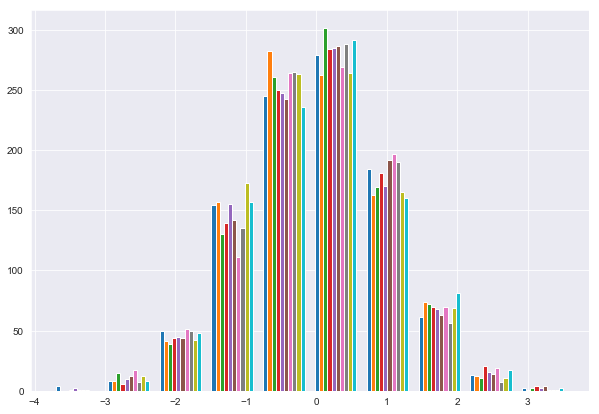

In [6]:
plt.hist(X)

In [8]:
# Create normally distributed outcome related to parameters but with noise
y = X[:,0] + 2 * X[:,1] + np.random.normal(size=n * 1) + 5

In [9]:
y

array([ 4.21052842e+00,  4.22540023e+00,  6.55677869e+00,  3.50547644e+00,
        6.15389476e+00,  5.94707789e+00,  4.86592579e+00,  5.50238631e+00,
        5.31046023e+00,  5.08181183e+00,  7.00577544e+00,  6.12110850e+00,
        4.35848083e+00,  3.01806582e+00,  2.82462657e+00,  4.11191781e+00,
        5.86857116e+00,  5.36690136e+00,  2.61063842e+00,  4.09970826e+00,
        3.60876674e+00,  2.44325132e-01,  4.55794575e+00,  8.17625533e+00,
        4.12079417e+00,  1.10225159e+01,  4.18917202e+00,  4.38819504e+00,
        2.04353595e+00,  3.99872463e+00,  2.99120043e+00,  3.02523188e+00,
        7.25678293e+00, -1.18627847e+00,  2.98908932e+00,  8.00740870e+00,
        5.64533001e-01,  7.02416973e+00,  3.36409546e+00,  3.65480401e+00,
        5.64150014e+00,  9.59813940e+00,  8.90272163e+00,  3.81275815e+00,
        7.80339790e+00,  3.29281616e+00,  5.85086826e+00,  2.77258938e+00,
        4.78515294e+00,  4.94092487e+00,  5.69909078e+00,  5.28677275e+00,
        5.34043432e+00,  

(array([  7.,  18.,  79., 175., 243., 218., 138.,  78.,  35.,   9.]),
 array([-2.3887346 , -0.92239032,  0.54395396,  2.01029824,  3.47664252,
         4.9429868 ,  6.40933107,  7.87567535,  9.34201963, 10.80836391,
        12.27470819]),
 <a list of 10 Patch objects>)

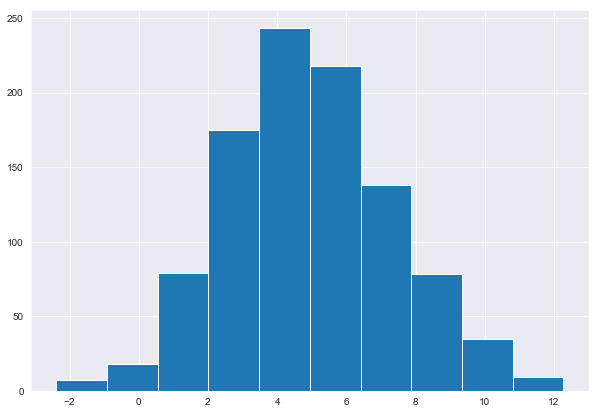

In [10]:
plt.hist(y)

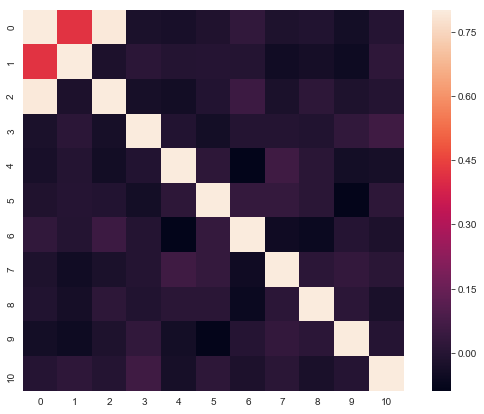

In [13]:
# check out correlations. first column is the outcome
f, ax = plt.subplots()
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8237699641789551


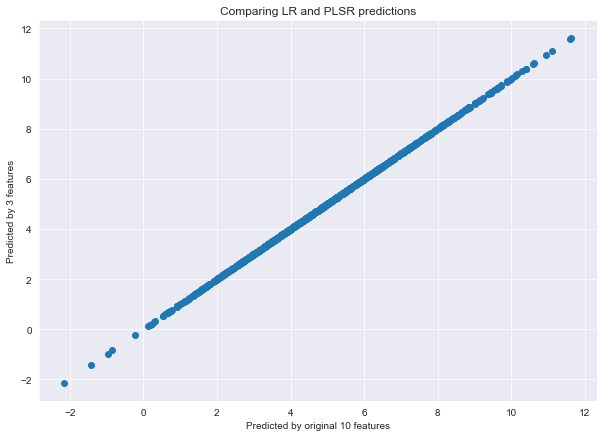

In [22]:
# Fit a linear model with all 10 features
linreg = LinearRegression()
linreg.fit(X, y)

# save predicted values
y_pred = linreg.predict(X)
print('R-squared regression:', linreg.score(X, y))

# Fit a linear model using Partial Least Squares Regression
# Reduce feature space to 3 dimensions
pls1 = PLSRegression(n_components=3)

# reduce X to R(X) and regress on y
pls1.fit(X, y)

# Save predicted values
y_pls_pred = pls1.predict(X)
print('R-sqaured PLSR:', pls1.score(X, y))

# Compare the predcionts of the two models
plt.scatter(y_pred, y_pls_pred)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Iteration: 1 
n_component: 1
R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8167307271476261


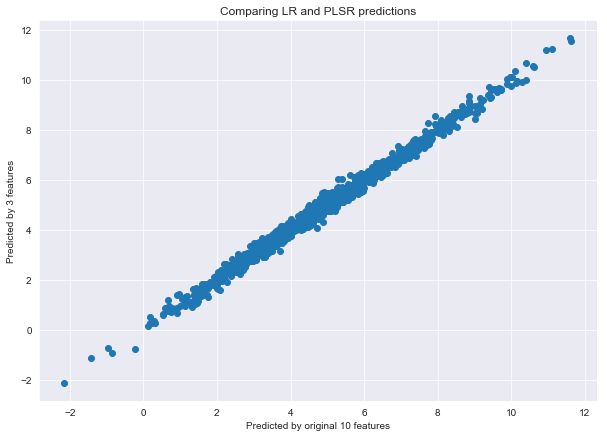


Iteration: 2 
n_component: 2
R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8237191492159625


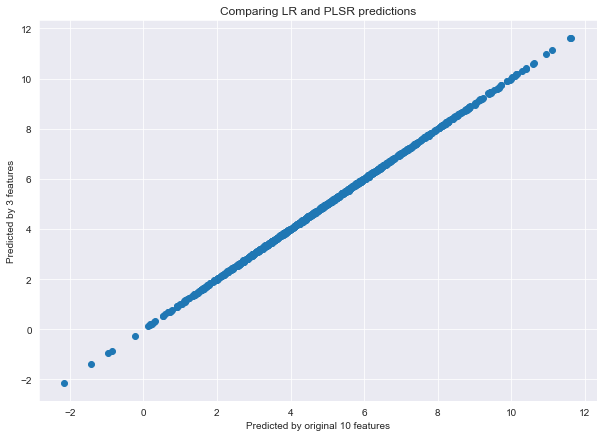


Iteration: 3 
n_component: 3
R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8237699641789551


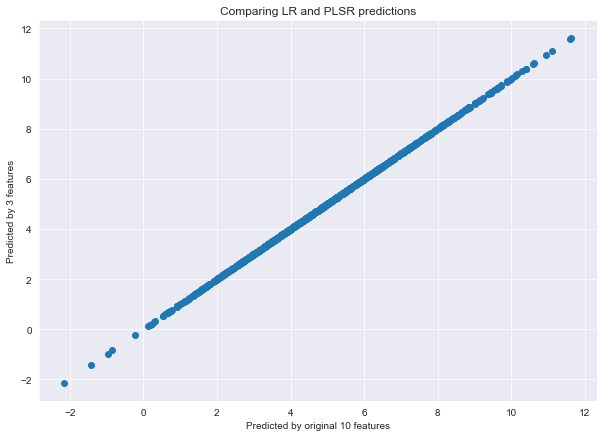


Iteration: 4 
n_component: 4
R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8237702557347854


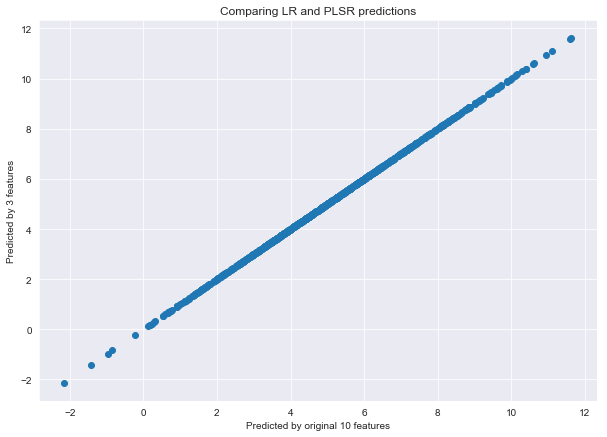


Iteration: 5 
n_component: 5
R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8237702581978141


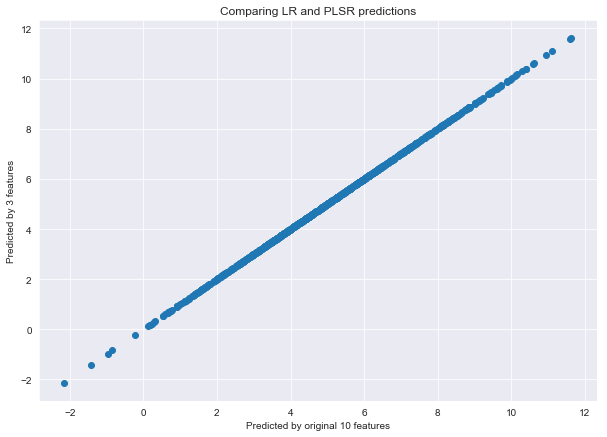


Iteration: 6 
n_component: 6
R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8237702582082292


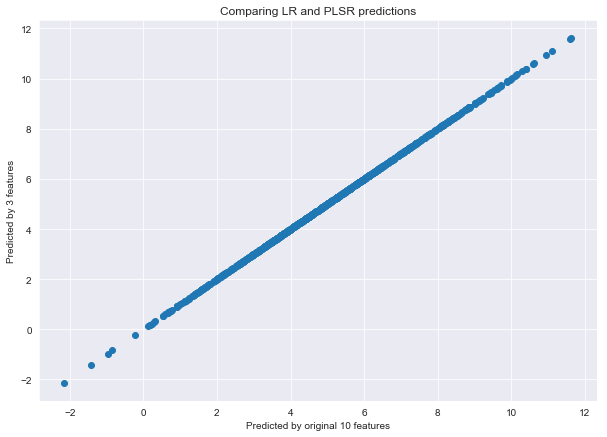


Iteration: 7 
n_component: 7
R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8237702582082669


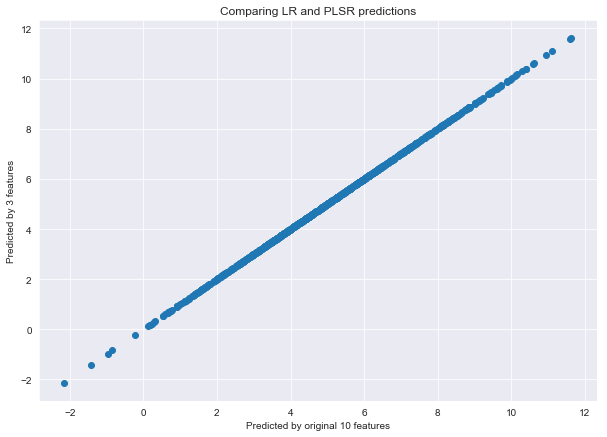


Iteration: 8 
n_component: 8
R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8237702582082673


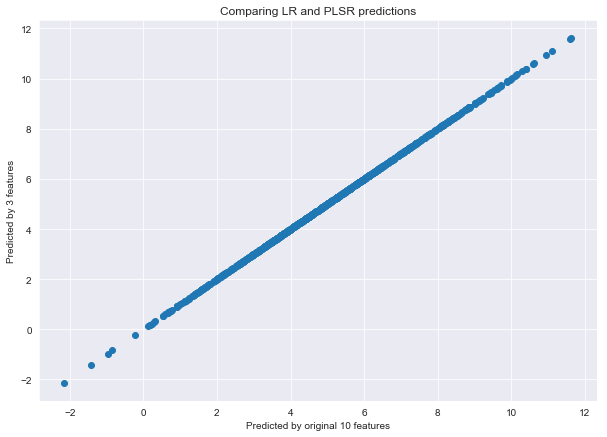


Iteration: 9 
n_component: 9
R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8237702582082672


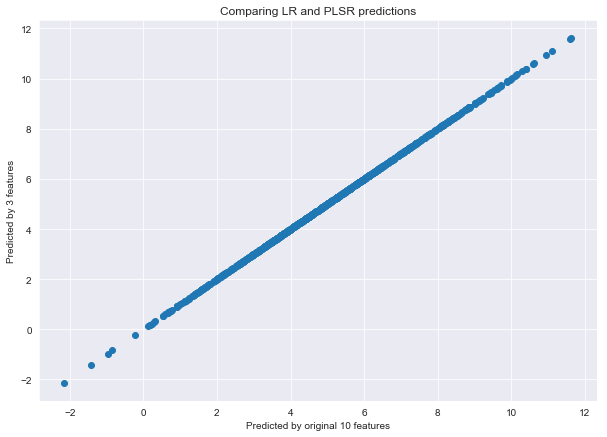


Iteration: 10 
n_component: 10
R-squared regression: 0.8237702582082672
R-sqaured PLSR: 0.8237702582082672


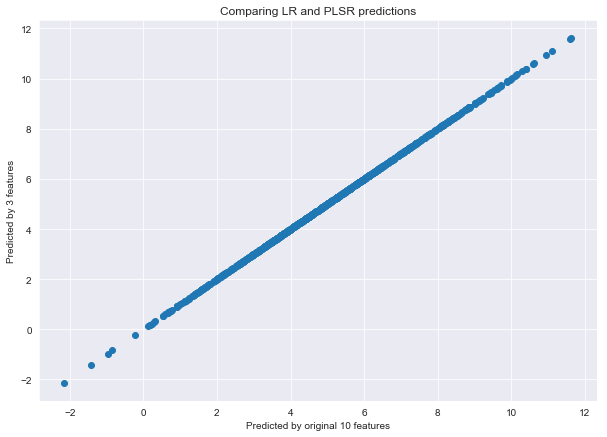

In [27]:
for i in range(1,11):
    # Fit a linear model with all 10 features
    print('Iteration:', i, '\nn_component:', i)
    linreg = LinearRegression()
    linreg.fit(X, y)

    # save predicted values
    y_pred = linreg.predict(X)
    print('R-squared regression:', linreg.score(X, y))

    # Fit a linear model using Partial Least Squares Regression
    # Reduce feature space to 3 dimensions
    pls1 = PLSRegression(n_components=i)

    # reduce X to R(X) and regress on y
    pls1.fit(X, y)

    # Save predicted values
    y_pls_pred = pls1.predict(X)
    print('R-sqaured PLSR:', pls1.score(X, y))

    # Compare the predcionts of the two models
    plt.scatter(y_pred, y_pls_pred)
    plt.xlabel('Predicted by original 10 features')
    plt.ylabel('Predicted by 3 features')
    plt.title('Comparing LR and PLSR predictions')
    plt.show()
    print()